In [48]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [49]:
comments = pd.read_csv('../input/d/xyxyxxxy/erjiu-lda/comments_all_20220825.csv')

In [50]:
comment_text = np.array(comments['comments'])

In [51]:
import jieba
import re
import csv
 
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('../input/d/xyxyxxxy/erjiu-lda/hit_stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords
 
def processing(text):
    """
    数据清洗
    """
    re.sub("\[.*\]", "", text)         # 去除 @xxx (用户名)
    text = re.sub("\(.*\)", "", text)             # 去除 【xx】 (里面的内容通常都不是用户自己写的)
#     text = re.sub(".*?:", "", text)                #去除微博用户的名字
#     text = re.sub("#.*#", "", text)                #去除话题引用
    text = re.sub("\n","",text)
    return text
 
# 对句子进行中文分词
def seg_depart(sentence):
#     jieba.load_userdict('自定义词库V2.txt')
    sentence_depart = jieba.cut(sentence.strip())
    print(sentence_depart)
    stopwords = stopwordslist()        # 创建一个停用词列表
    outstr = ''        # 输出结果为outstr
    for word in sentence_depart:          # 去停用词
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr
 

# outputs = open("output.csv", 'w', encoding='UTF-8')  #输出文档路径
line_segs= []
for line in comment_text:
    wash_line = processing(line)
    line_seg = seg_depart(wash_line)
    line_segs.append(line_seg)
#     outputs.write(line_seg + '\n')
# outputs.close()
print("分词成功！！！")

<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60575d0>
<generator object Tokenizer.cut at 0x7f43a60576d0>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60575d0>
<generator object Tokenizer.cut at 0x7f43a60579d0>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a6057450>
<generator object Tokenizer.cut at 0x7f43a60576d0>
<generator object Tokenizer.cut at 0x7f43a60576d0>
<generator object Tokenizer.cut at 0x7f43a6057450>
<generator object Tokenizer.cut at 0x7f43a60572d0>
<generator object Tokenizer.cut at 0x7f43a60576d0>
<generator object Tokenizer.cut at 0x7f43a6057450>
<generator object Tokenizer.cut at 0x7f43a60579d0>
<generator object Tokenizer.cut at 0x7f43a6057450>
<generator object Tokenizer.cut

In [52]:
data_set=[]  #建立存储分词的列表
for i in range(len(line_segs)):
    result=[]
    seg_list = line_segs[i].split()
    for w in seg_list :  #读取每一行分词
        result.append(w)
    data_set.append(result)

In [53]:
dictionary = corpora.Dictionary(data_set)  # 构建词典
corpus = [dictionary.doc2bow(text) for text in data_set]

In [54]:
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

In [55]:
x = range(1,10)
z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
# y = [coherence(i) for i in x]

[(0, '0.025*"二舅" + 0.018*"人" + 0.012*"看" + 0.011*"不" + 0.010*"都" + 0.010*"好" + 0.010*"视频" + 0.008*"很" + 0.007*"遗憾" + 0.007*"人生" + 0.007*"平凡" + 0.007*"生活" + 0.006*"真的" + 0.005*"没有" + 0.005*"说"')]
-8.023430238113853
[(0, '0.033*"二舅" + 0.033*"人" + 0.019*"不" + 0.013*"遗憾" + 0.012*"人生" + 0.012*"平凡" + 0.012*"生活" + 0.012*"都" + 0.008*"看" + 0.007*"没有" + 0.007*"伟大" + 0.007*"快乐" + 0.006*"却" + 0.006*"里" + 0.005*"去"'), (1, '0.020*"好" + 0.019*"视频" + 0.018*"看" + 0.016*"二舅" + 0.012*"很" + 0.010*"大哭" + 0.010*"_" + 0.010*"文案" + 0.009*"真的" + 0.009*"哭" + 0.008*"up" + 0.008*"都" + 0.006*"谢谢" + 0.006*"支持" + 0.006*"说"')]
-7.974255274600721
[(0, '0.029*"人" + 0.024*"二舅" + 0.018*"都" + 0.017*"不" + 0.016*"遗憾" + 0.011*"看" + 0.010*"没有" + 0.009*"很" + 0.009*"快乐" + 0.008*"会" + 0.008*"去" + 0.008*"说" + 0.008*"人生" + 0.007*"做" + 0.007*"想"'), (1, '0.030*"视频" + 0.027*"看" + 0.027*"好" + 0.020*"二舅" + 0.016*"大哭" + 0.016*"_" + 0.015*"文案" + 0.014*"很" + 0.014*"哭" + 0.014*"up" + 0.013*"真的" + 0.010*"谢谢" + 0.008*"真" + 0.008*"call" + 0.0

KeyboardInterrupt: 

In [46]:
pd.DataFrame(line_segs).to_csv('seg_result_comment.csv')

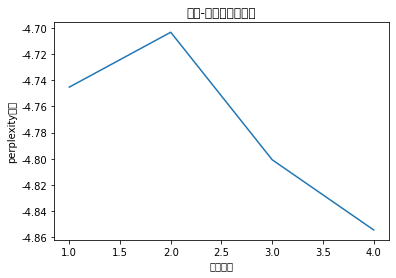

In [47]:
plt.plot(x, z)
plt.xlabel('主题数目')
plt.ylabel('perplexity大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-困惑度变化情况')
plt.show()

In [23]:
text = '币大于赞系列代表[打call][打call]'
re.sub("\[.*\]", "", text)    

'币大于赞系列代表'